<a href="https://colab.research.google.com/github/U-ohata/Rabbit_Report_2/blob/Rabbit_Report_Colaboratory/reportbox_3/2_5_overfiting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 準備

## Googleドライブのマウント

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [3]:
import sys
#sys.path.append('/content/drive/My Drive/DNN_code')
sys.path.append('/content/drive/My Drive/Pythonライブラリ基礎講座/DNN_code_colab_lesson_1_2')
#sys.path.append('/content/drive/My Drive/DNN_code/lesson_2')
sys.path.append('/content/drive/My Drive/Pythonライブラリ基礎講座/DNN_code_colab_lesson_1_2/lesson_2')

# overfiting

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.29
                : 10. 正答率(テスト) = 0.192
Generation: 20. 正答率(トレーニング) = 0.37666666666666665
                : 20. 正答率(テスト) = 0.2489
Generation: 30. 正答率(トレーニング) = 0.46
                : 30. 正答率(テスト) = 0.3123
Generation: 40. 正答率(トレーニング) = 0.5633333333333334
                : 40. 正答率(テスト) = 0.4101
Generation: 50. 正答率(トレーニング) = 0.6266666666666667
                : 50. 正答率(テスト) = 0.4742
Generation: 60. 正答率(トレーニング) = 0.7266666666666667
                : 60. 正答率(テスト) = 0.5083
Generation: 70. 正答率(トレーニング) = 0.74
                : 70. 正答率(テスト) = 0.5481
Generation: 80. 正答率(トレーニング) = 0.81
                : 80. 正答率(テスト) = 0.5772
Generation: 90. 正答率(トレーニング) = 0.8433333333333334
                : 90. 正答率(テスト) = 0.6115
Generation: 100. 正答率(トレーニング) = 0.87
                : 100. 正答率(テスト) = 0.6398
Generation: 110. 正答率(トレーニング) = 0.8766666666666667
                : 110. 正答率(テスト) = 0.6468
Generation: 120. 正答率(トレーニング) = 0.8666666666666667
                : 120. 正答率(

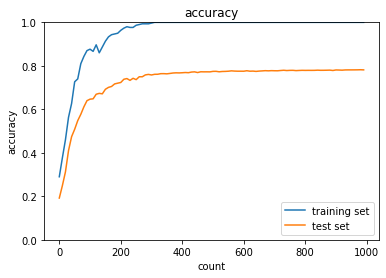

In [4]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## weight decay
### L2

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.12
                : 10. 正答率(テスト) = 0.1014
Generation: 20. 正答率(トレーニング) = 0.12333333333333334
                : 20. 正答率(テスト) = 0.1071
Generation: 30. 正答率(トレーニング) = 0.14
                : 30. 正答率(テスト) = 0.1173
Generation: 40. 正答率(トレーニング) = 0.15666666666666668
                : 40. 正答率(テスト) = 0.13
Generation: 50. 正答率(トレーニング) = 0.18333333333333332
                : 50. 正答率(テスト) = 0.1471
Generation: 60. 正答率(トレーニング) = 0.22
                : 60. 正答率(テスト) = 0.1696
Generation: 70. 正答率(トレーニング) = 0.25333333333333335
                : 70. 正答率(テスト) = 0.1915
Generation: 80. 正答率(トレーニング) = 0.29333333333333333
                : 80. 正答率(テスト) = 0.213
Generation: 90. 正答率(トレーニング) = 0.3333333333333333
                : 90. 正答率(テスト) = 0.2411
Generation: 100. 正答率(トレーニング) = 0.34
                : 100. 正答率(テスト) = 0.2561
Generation: 110. 正答率(トレーニング) = 0.36333333333333334
                : 110. 正答率(テスト) = 0.268
Generation: 120. 正答率(トレーニング) = 0.37666666666666665
          

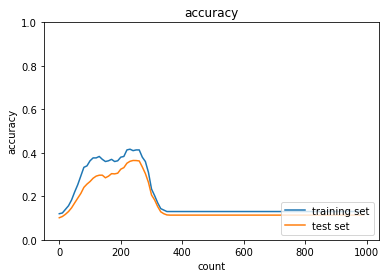

In [7]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.3
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.3433333333333333
                : 10. 正答率(テスト) = 0.2899
Generation: 20. 正答率(トレーニング) = 0.6133333333333333
                : 20. 正答率(テスト) = 0.4471
Generation: 30. 正答率(トレーニング) = 0.61
                : 30. 正答率(テスト) = 0.472
Generation: 40. 正答率(トレーニング) = 0.62
                : 40. 正答率(テスト) = 0.4843
Generation: 50. 正答率(トレーニング) = 0.4533333333333333
                : 50. 正答率(テスト) = 0.3407
Generation: 60. 正答率(トレーニング) = 0.6433333333333333
                : 60. 正答率(テスト) = 0.5372
Generation: 70. 正答率(トレーニング) = 0.6866666666666666
                : 70. 正答率(テスト) = 0.5559
Generation: 80. 正答率(トレーニング) = 0.5366666666666666
                : 80. 正答率(テスト) = 0.4663
Generation: 90. 正答率(トレーニング) = 0.7166666666666667
                : 90. 正答率(テスト) = 0.6152
Generation: 100. 正答率(トレーニング) = 0.65
                : 100. 正答率(テスト) = 0.4756
Generation: 110. 正答率(トレーニング) = 0.6733333333333333
                : 110. 正答率(テスト) = 0.544
Generation: 120. 正答率(トレーニング) = 0.6933333333333334
 

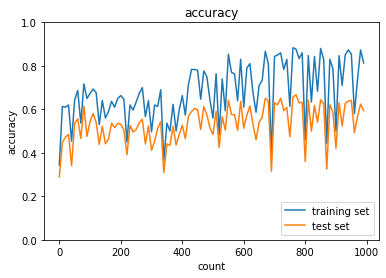

In [8]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.01
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------
## [try] weigth_decay_lambdaの値を変更して正則化の強さを確認しよう
----------------------------------------------------------------------------------------------------------------------------------------

L2のweight_decay_lambdaの値を0.1から0.3に

L2のweight_decay_lambdaの値を0.005から0.01に変更

## Dropout

In [5]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.09
                : 10. 正答率(テスト) = 0.0926
Generation: 20. 正答率(トレーニング) = 0.09
                : 20. 正答率(テスト) = 0.0962
Generation: 30. 正答率(トレーニング) = 0.09333333333333334
                : 30. 正答率(テスト) = 0.0944
Generation: 40. 正答率(トレーニング) = 0.09666666666666666
                : 40. 正答率(テスト) = 0.1012
Generation: 50. 正答率(トレーニング) = 0.11
                : 50. 正答率(テスト) = 0.11
Generation: 60. 正答率(トレーニング) = 0.12666666666666668
                : 60. 正答率(テスト) = 0.1176
Generation: 70. 正答率(トレーニング) = 0.13666666666666666
                : 70. 正答率(テスト) = 0.126
Generation: 80. 正答率(トレーニング) = 0.14333333333333334
                : 80. 正答率(テスト) = 0.1359
Generation: 90. 正答率(トレーニング) = 0.14666666666666667
                : 90. 正答率(テスト) = 0.141
Generation: 100. 正答率(トレーニング) = 0.17333333333333334
                : 100. 正答率(テスト) = 0.1582
Generation: 110. 正答率(トレーニング) = 0.18666666666666668
                : 110. 正答率(テスト) = 0.1816
Generation: 120. 正答率(トレーニング) = 0.21
         

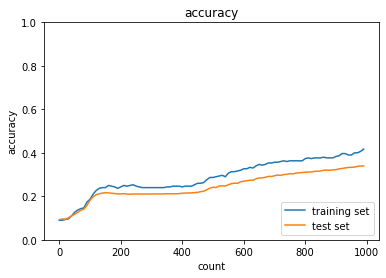

In [9]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.3
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.02)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] dropout_ratioの値を変更してみよう

dropout_rateの値を0.1から0.2に変更

## [try] optimizerとdropout_ratioの値を変更してみよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------

dropout_rateの値を0.2から0.3に変更

optimizerの学習率を0.02に変更

## Dropout + L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.10666666666666667
                : 10. 正答率(テスト) = 0.1143
Generation: 20. 正答率(トレーニング) = 0.14
                : 20. 正答率(テスト) = 0.124
Generation: 30. 正答率(トレーニング) = 0.15
                : 30. 正答率(テスト) = 0.1243
Generation: 40. 正答率(トレーニング) = 0.14
                : 40. 正答率(テスト) = 0.1248
Generation: 50. 正答率(トレーニング) = 0.16333333333333333
                : 50. 正答率(テスト) = 0.1422
Generation: 60. 正答率(トレーニング) = 0.17666666666666667
                : 60. 正答率(テスト) = 0.153
Generation: 70. 正答率(トレーニング) = 0.20666666666666667
                : 70. 正答率(テスト) = 0.1682
Generation: 80. 正答率(トレーニング) = 0.21333333333333335
                : 80. 正答率(テスト) = 0.183
Generation: 90. 正答率(トレーニング) = 0.24333333333333335
                : 90. 正答率(テスト) = 0.2072
Generation: 100. 正答率(トレーニング) = 0.26
                : 100. 正答率(テスト) = 0.2244
Generation: 110. 正答率(トレーニング) = 0.2733333333333333
                : 110. 正答率(テスト) = 0.2427
Generation: 120. 正答率(トレーニング) = 0.29
                : 120. 正

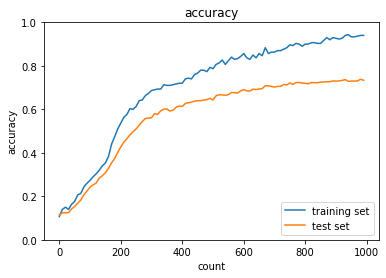

In [10]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.08
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []
hidden_layer_num = network.hidden_layer_num

plot_interval=10

# 正則化強度設定 ======================================
weight_decay_lambda=0.004
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()